In [11]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'darkslategray', 'olive', '#9467bd', '#8c564b', '#e377c2', 'indigo', '#7f7f7f', '#bcbd22', '#17becf', 'tan', 'saddlebrown', 'darkgreen']
# Set the color cycle
plt.rc('axes', prop_cycle=(cycler('color', colors)))

# Dictionary to store the loaded arrays
L = 4
N = L*L
periodic = False
model = "2DRyberg"

if model == "2DXXZ":
    int_ = "delta"
    params = [1.2, 1.05, 1., 0.95, 0.8, 0.2,-0.2, -0.8, -0.95, -1.0, -1.05, -1.2]  #sigmaz interaction
elif model == "2DJ1J2":
    int_ = "J2"
    params = [0.2, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.8, 1.0, 1.05, 1.2] #J2
elif model == "2DTFIM":
    int_ = "B"
    params =  [0, -0.5, -1.0, -1.2, -1.4, -1.6, -1.8, -2.0, -2.5, -4.0] #magnetic field
elif model == "2DRyberg":
    int_ = "delta"
    params = [ 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4 ]
cmi = {}
mean_corr= {}
var_corr = {}
gap = {}
cmi_traceout = {}
mag = {}
stagger_mag = {}
# Looping through the values and loading each file
for param in params:
    filename = f"result/{model}/cmi_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi[param] = np.load(filename)
    cmi[param] = cmi[param][cmi[param]>1e-13]
    filename = f"result/{model}/mean_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mean_corr[param] = np.load(filename)
    filename = f"result/{model}/var_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    var_corr[param] = np.load(filename)
    var_corr[param] = var_corr[param][mean_corr[param]>1e-13]
    mean_corr[param] = mean_corr[param][mean_corr[param]>1e-13]

    filename = f"result/{model}/gap_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    gap[param] = np.load(filename)
    filename = f"result/{model}/cmi_traceout_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi_traceout[param] = np.load(filename, allow_pickle=True)
    for j in range(len(cmi_traceout[param])):
        cmi_traceout[param][j] = np.array(cmi_traceout[param][j])[np.array(cmi_traceout[param][j])>1e-13]
    filename = f"result/{model}/mag_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mag[param] = np.load(filename)
    filename = f"result/{model}/stagger_mag_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    stagger_mag[param] = np.load(filename)

In [12]:
print(cmi_traceout)

{0.4: array([array([8.75210699e-02, 9.03030267e-04, 7.39495864e-05, 3.31809224e-06,
              5.69928525e-07, 5.78616550e-08])                               ,
       array([4.13555003e-02, 2.94595203e-03, 8.96135426e-05, 6.34851743e-06,
              2.40492407e-07])                                               ,
       array([6.02121598e-02, 5.39365160e-04, 2.98295782e-04, 8.21650332e-06,
              8.24344489e-07])                                               ,
       array([4.64721777e-02, 1.06513109e-03, 1.76097183e-04, 7.21498381e-05,
              3.09322746e-06, 3.35518967e-07])                               ,
       array([3.90970245e-02, 6.87476250e-04, 3.53651100e-05, 1.69896376e-06,
              3.52330851e-07])                                               ,
       array([2.39175230e-02, 5.01687452e-04, 2.69381831e-05, 2.10280985e-07]),
       array([2.80469961e-02, 3.33114164e-04, 2.63140870e-05, 1.17868697e-06]),
       array([2.29809407e-02, 4.53540591e-04, 3.5

In [13]:
cmi_length = []
err_cmi_length =[]
corre_length = []
err_corre_length = []
cmi_length_traceout = [[] for i in range (len(params))]
err_cmi_length_traceout = [[] for i in range (len(params))]
for i in params:
    df = len(cmi[i])-2
    if df>=1:
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i])), -np.log(cmi[i]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i])) - mean_x)**2))
        cmi_length.append(1/cmi_len)
        err_cmi_length.append(1/cmi_len**2*err)

    df = len(mean_corr[i])-2
    if df >=1:
        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i])), -np.log(np.abs(mean_corr[i])), 1, full=True)
        mean_x = np.mean(np.arange(len(mean_corr[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i])) - mean_x)**2))
        corre_length.append(1/corr_len)
        err_corre_length.append(1/corr_len**2*err)

    for j in range(len(cmi_traceout[i])):
        df = len(cmi_traceout[i][j])-2
        if df>=1:
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i][j])), -np.log(cmi_traceout[i][j]), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[i][j])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i][j])) - mean_x)**2))
            cmi_length_traceout[params.index(i)].append(cmi_len)
            err_cmi_length_traceout[params.index(i)].append(err)




In [14]:
print(err_corre_length)
print(corre_length)

[array([0.16080197]), array([0.44692095]), array([2.53429585]), array([38.04698219]), array([6.10801613]), array([7.86874952]), array([9.3945063]), array([10.74358808]), array([12.37895615]), array([15.17011405]), array([21.84144935])]
[1.3631982500271063, 2.5171824395000253, 7.754341148686341, -56.29750712750477, -19.796985011893632, -17.776423468454222, -17.475523395038696, -17.683017760615346, -18.37442877498974, -19.90035069187877, -23.44037007587259]


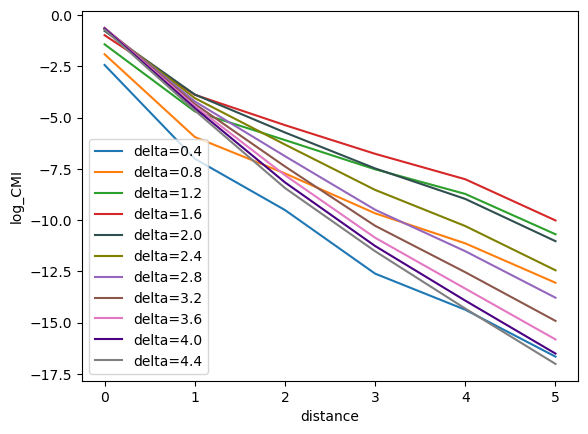

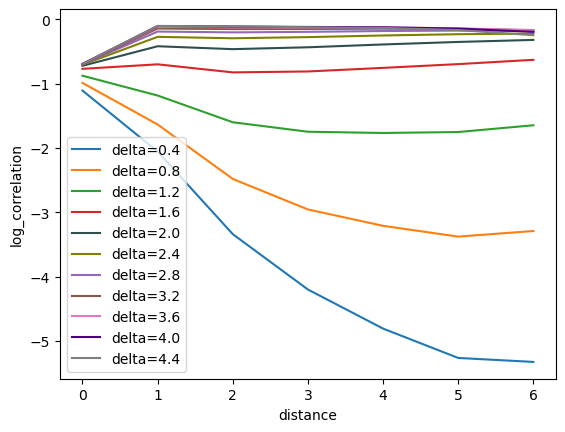

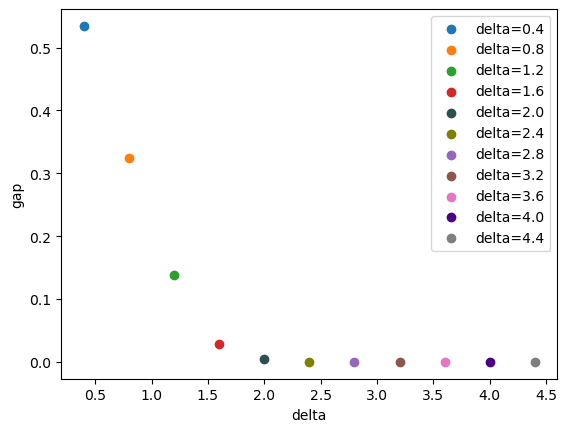

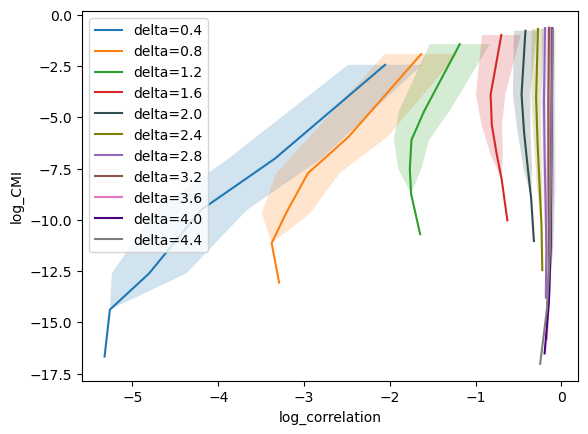

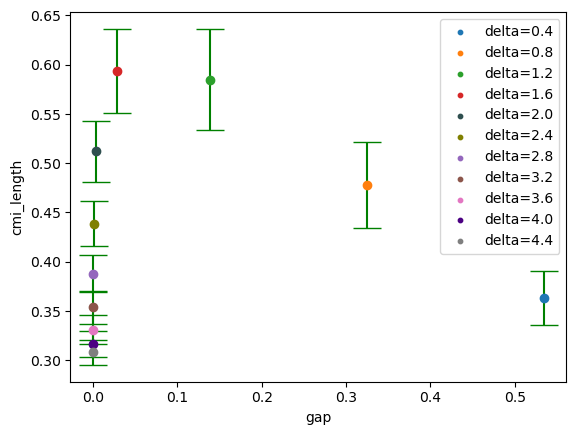

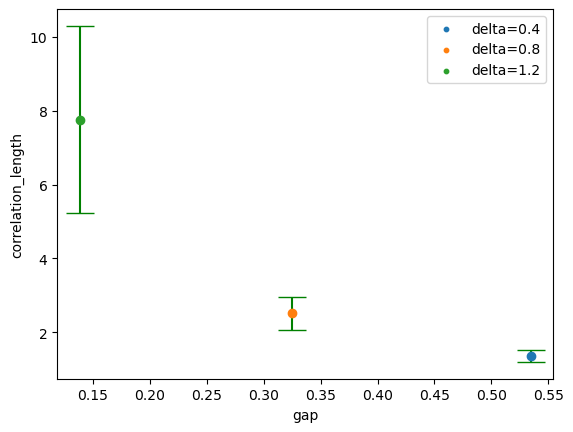

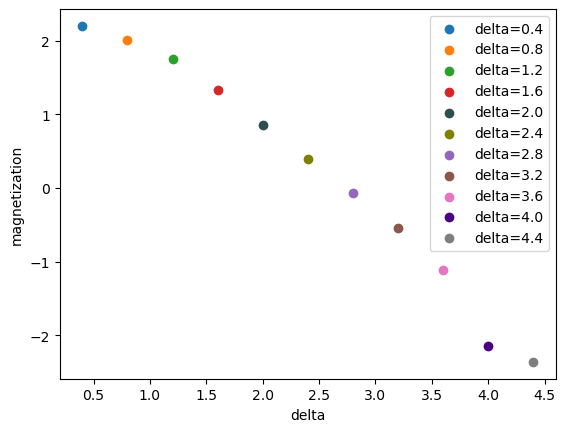

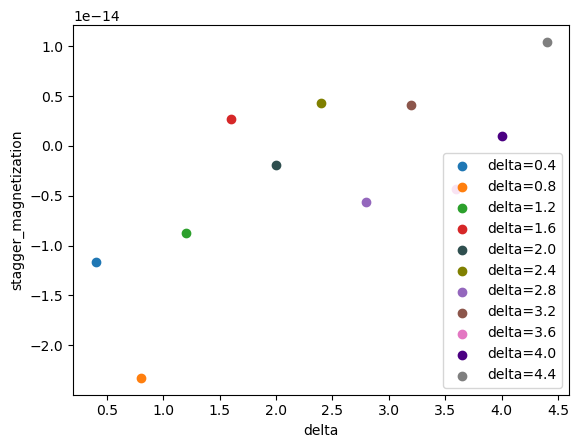

In [15]:
for i in params:
    if len(cmi[i]>=3):  #so that meaningful error can be got
        plt.plot(np.log(cmi[i]), label= int_+"="+str(i))
plt.xlabel("distance")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/cmi_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    if len(mean_corr[i]>=3):  #so that meaningful error can be got
        plt.plot(np.log(np.abs(mean_corr[i])), label=int_+"="+str(i))
    #plt.fill_between(np.arange(len(mean_corr[i])) ,np.log(np.abs(mean_corr[i])) - 1/mean_corr[i]*np.sqrt(var_corr[i]) , np.log(np.abs(mean_corr[i])) + 1/np.abs(mean_corr[i])*np.sqrt(var_corr[i]), alpha=0.2)
plt.xlabel("distance")
plt.ylabel("log_correlation")
plt.legend()
plt.savefig("figure/"+model+"/correlation_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    plt.scatter(i, gap[i], label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("gap")
plt.legend()
plt.savefig("figure/"+model+"/gap_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    length = min(len(cmi[i]), len(mean_corr[i]))
    mean_corr[i] = np.abs(mean_corr[i])
    plt.plot(np.log(mean_corr[i][1:length+1]), np.log(cmi[i][:length]), label= int_ + "=" + str(i))
    if periodic == False:
        plt.fill_betweenx(np.log(cmi[i][:length]),
                          np.log(mean_corr[i][1:length+1]) - 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]),
                          np.log(mean_corr[i][1:length+1]) + 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]), alpha=0.2)
plt.xlabel("log_correlation")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/correlation_cmi_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()


gap_list = []
for i in params:
    if len(cmi[i])>=3:
        gap_list.append(gap[i])
for i,j in zip(params, range(len(gap_list))):
    plt.scatter(gap_list[j], cmi_length[j], label= int_ +"=" + str(i), s=10)
    plt.errorbar(gap_list[j], cmi_length[j], yerr=err_cmi_length[j][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("cmi_length")
plt.legend()
plt.savefig(
    "figure/"+model+"/cmi_length_gap_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

gap_list = []
for i in params:
    if len(mean_corr[i])>=3 and corre_length[params.index(i)]>0 and corre_length[params.index(i)]<100:
        gap_list.append(gap[i])
for i,j in zip(params, range(len(gap_list))):
    plt.scatter(gap_list[j], np.array(corre_length)[(np.array(corre_length)>0) & (np.array(corre_length)<100)][j], label= int_ +"=" + str(i), s=10)
    plt.errorbar(gap_list[j], np.array(corre_length)[(np.array(corre_length)>0) & (np.array(corre_length)<100) ][j], yerr=np.array(err_corre_length)[(np.array(corre_length)>0) & (np.array(corre_length)<100), 0][j], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("correlation_length")
plt.legend()
plt.savefig("figure/"+model+"/correlation_length_gap_"+model+"_L" + str(L) +  "_"+ "periodic_" + str(
    periodic) + ".png")
plt.show()
plt.clf()

for i in params:
    mag[i] = np.abs(mag[i])
    plt.scatter(i, np.log(mag[i]), label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("magnetization")
plt.legend()
plt.savefig("figure/"+model+"/mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    stagger_mag[i] = stagger_mag[i]
    plt.scatter(i, stagger_mag[i], label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("stagger_magnetization")
plt.legend()
plt.savefig("figure/"+model+"/stagger_mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()
    

0
[2.752990596286698, 3.025002094488956, 2.658184082221686, 2.2174467063388485, 2.923698131655148, 3.7849464399563013, 3.277008804064632, 2.4612080966586563]


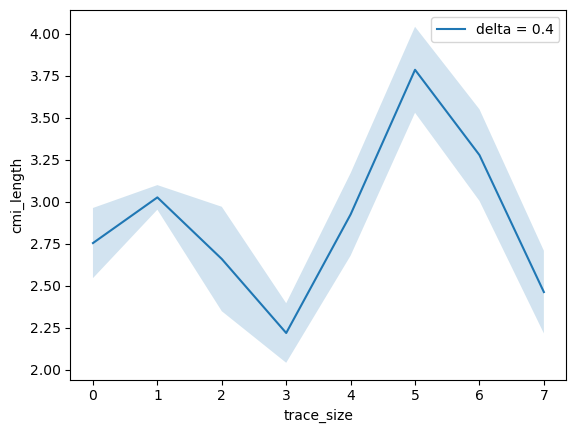

1
[2.093218067504606, 2.406814684058667, 2.154736557235454, 1.693951530300883, 2.114899768040471, 2.77588508124425, 2.386552362779289, 1.6847810386831594]


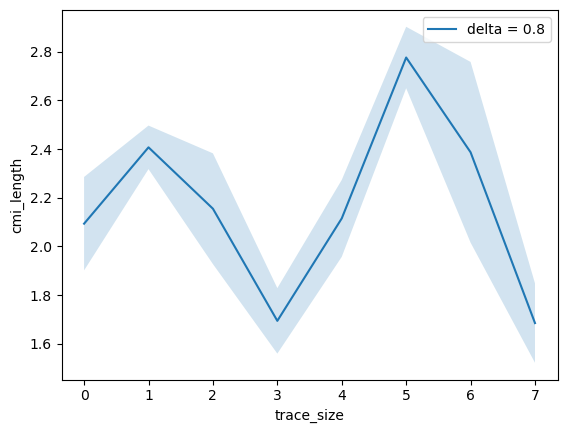

2
[1.7098298365601867, 1.9926966182636923, 1.859321948730351, 1.3868947237969176, 1.6578953751640295, 2.176937725179827, 1.9107320660682716, 1.2496539898125398]


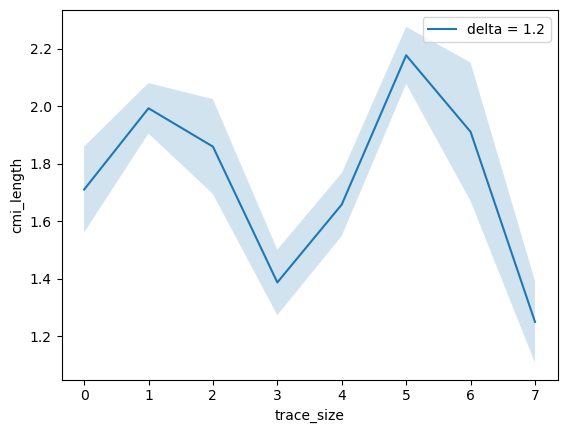

3
[1.684290448602372, 1.9760427412250512, 1.9049492948201276, 1.4029786594231044, 1.6524023643098262, 2.101532677195981, 1.87150259571243, 1.2455532357962835]


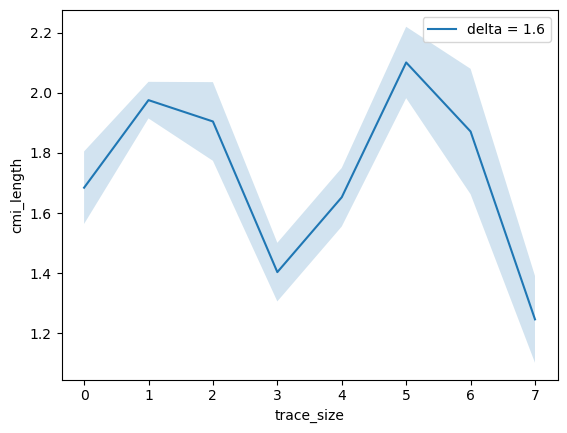

4
[1.9524037038769435, 2.3042581612356607, 2.2383138824440807, 1.6562132668603768, 1.9220781145543875, 2.4017352695803846, 2.138724597485226, 1.4523331260942636]


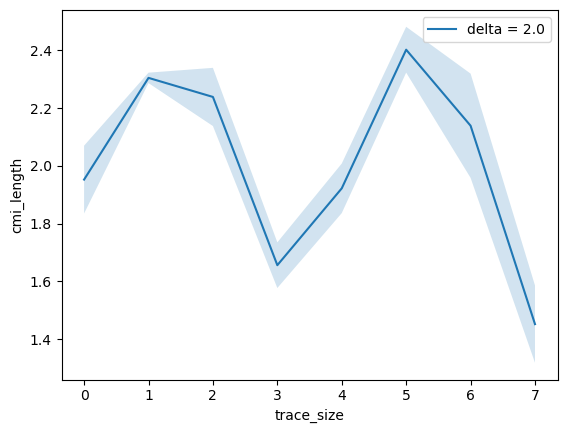

5
[2.279285513529699, 2.6941119479068574, 2.6161242791498354, 1.9454797504430446, 2.2414196981699863, 2.7682839792623897, 2.473393838508276, 1.6737940278944532]


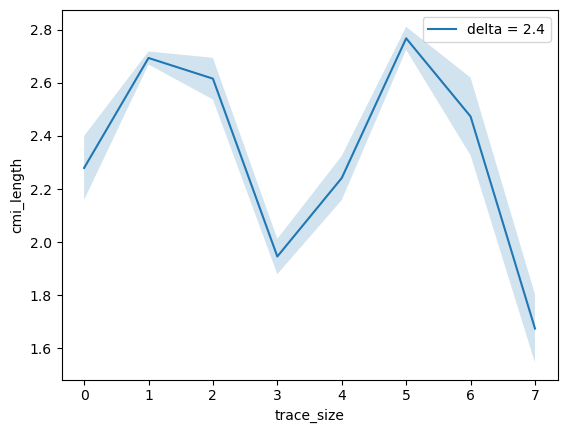

6
[2.5793191163685556, 3.0474229807992685, 2.951970581783696, 2.2074297778554106, 2.5387832066910088, 3.1080055819151933, 2.784096316675876, 1.8699495418849776]


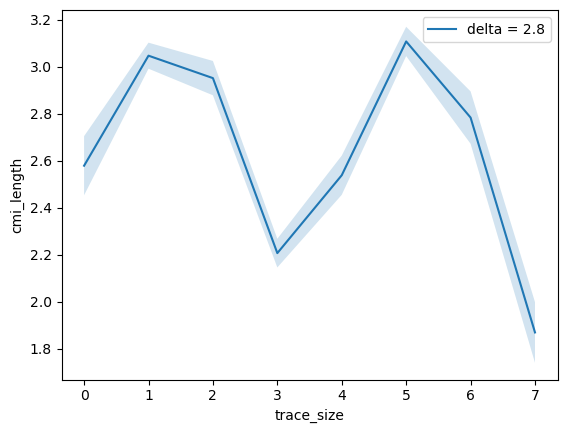

7
[2.8284174936865436, 3.340619725768237, 3.2257776160523335, 2.424286067536685, 2.7913069455904376, 3.3966790789752648, 3.0441803720655454, 2.0305589053009214]


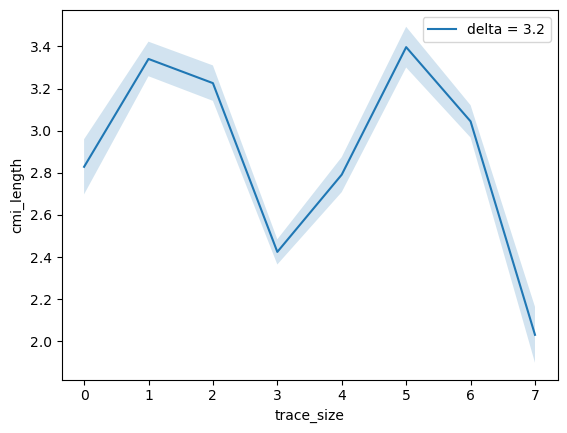

8
[3.021325675528651, 3.5691087860960136, 3.4341148282880876, 2.5943426986738296, 2.994771861157299, 3.6290728489721493, 3.248863677608299, 2.155808188357621]


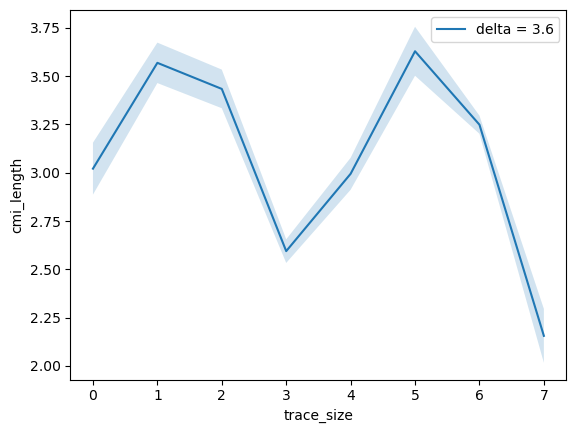

9
[3.159607774745059, 3.7341174201389316, 3.57888204191475, 2.7214071717348864, 3.1517384100158696, 3.806397569882977, 3.400439231638482, 2.2499273071186816]


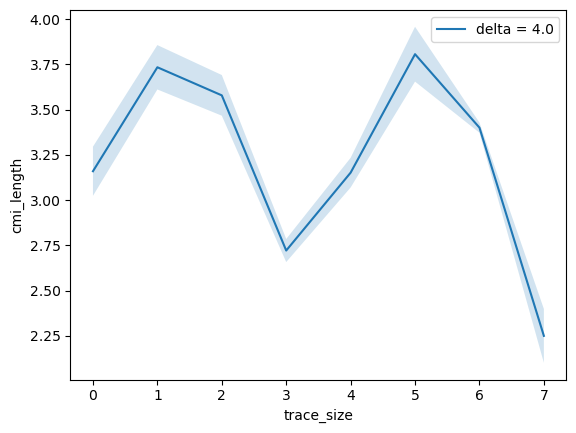

10
[3.246847781438642, 3.8385990101201117, 3.663936222149208, 2.8102631447832023, 3.26656590220459, 3.9325610104020843, 3.5030088707184306, 2.3181711794610096]


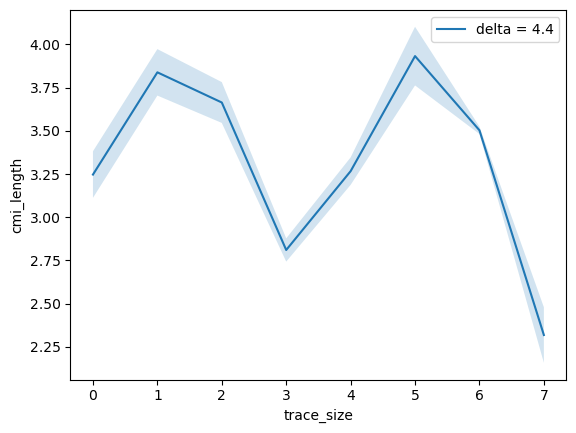

<Figure size 640x480 with 0 Axes>

In [16]:
for i in range(len(params)):
    print(i)
    print(cmi_length_traceout[i])
    if len(cmi_length_traceout[i])>=3:
        cmi_length_traceout[i] = np.array(cmi_length_traceout[i])
        err_cmi_length_traceout[i] = np.array(err_cmi_length_traceout[i]).ravel()
        plt.plot(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i], label="delta = " + str(params[i]))
        plt.fill_between(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i] - err_cmi_length_traceout[i],
                         cmi_length_traceout[i] + err_cmi_length_traceout[i], alpha=0.2)
        plt.xlabel("trace_size")
        plt.ylabel("cmi_length")
        plt.legend()
        plt.savefig(
            "figure/"+model+"/traceout/cmi_length_traceout_"+model+"_L" + str(L) +"_"+int_+"_" + str(params[i]) + "periodic_" + str(
                periodic) + ".png")
        plt.show()
        plt.clf()